<a href="https://colab.research.google.com/github/SalazarAE/Linear-Regression-Model-for-Rental-Price-Prediction/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Alberto Salazar

## Introduction

This report delves into an analysis of a dataset encompassing 10,000 apartment listings from various regions across the United States. The primary objective of this study is to explore these listings to understand the dynamics influencing apartment rental prices and to develop a robust predictive model for monthly rents. By leveraging detailed dataset descriptions, rigorous exploratory data analysis, and advanced predictive modeling techniques, the report aims to provide insightful findings that will aid stakeholders in the real estate market. The subsequent sections of the report will cover a comprehensive description of the data, the methodologies employed for price prediction, and the conclusions drawn from the analytical results.

## Data Description

The dataset serves as a vital resource for examining the factors that impact rental prices across diverse U.S. cities. Such an analysis is crucial for stakeholders including policymakers, real estate investors, and potential renters, as it provides a deeper understanding of market trends, pricing strategies, and the demand within the rental housing market.

Variables Description
The dataset initially included a wide array of variables, listed as follows:

id, title, body, amenities, currency, fee, has_photo, price_display, address, latitude, longitude, source, time: These variables were excluded from the analysis due to their limited relevance in predicting rental prices. For instance, text data like title and body require complex natural language processing which may not directly contribute to the initial scope of this analysis. Similarly, identifiers and location specifics like id, address, latitude, and longitude are too granular and not useful for generalized price prediction.
pets_allowed: Initially considered, this variable was later excluded as it did not significantly impact the model's predictive accuracy in preliminary tests.
The variables retained and utilized in the analysis include:

**Category** (Categorical): Specifies the type of rental (e.g., apartment, condo), important for distinguishing different segments of the housing market.

**Bathrooms** (Numerical): The number of bathrooms, a key feature that affects rental price valuation.

**Bedrooms** (Numerical): The number of bedrooms, directly influencing the size and suitability of the property for potential renters.

**Price** (Numerical): The rental price, used as the dependent variable in our predictive model.

**Price Type** (Categorical): Indicates whether the price is monthly or weekly, crucial for standardizing the dataset.

**Square Feet** (Numerical): The size of the apartment in square feet, a primary factor in pricing properties.
**Cityname** (Categorical): The city where the apartment is located, which is vital for geographical pricing analysis.

**State** (Categorical): The state, providing a broader regional context that influences rental prices.
Data Volume

The dataset contains 10,000 observations, each representing a unique apartment listing. The refined dataset includes eight variables chosen for their direct relevance to the study's objective.

Here's the revised section on price prediction incorporating the results and insights derived from the exploratory data analysis (EDA) and model performance metrics:

## Price Prediction

The predictive model used in this study is a linear regression model, chosen for its effectiveness in understanding and quantifying the relationship between multiple independent variables (such as number of bedrooms, city location, and apartment size) and the dependent variable, which is the rental price. Linear regression is particularly suitable for this kind of predictive analysis due to its simplicity, interpretability, and efficiency in providing insights into how each feature impacts the rental prices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv('gdrive/My Drive/apartment-rental-final.csv', encoding= 'cp1252')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


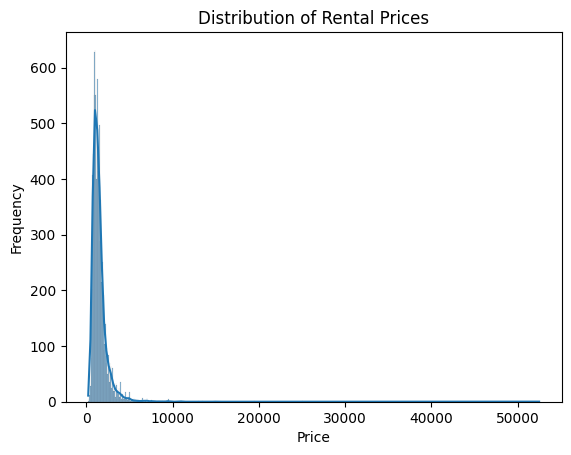

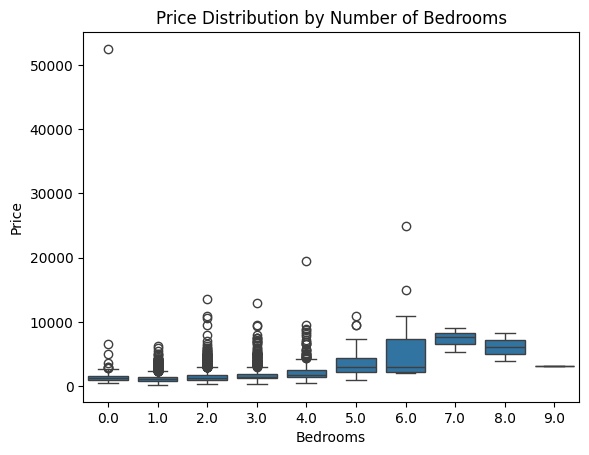

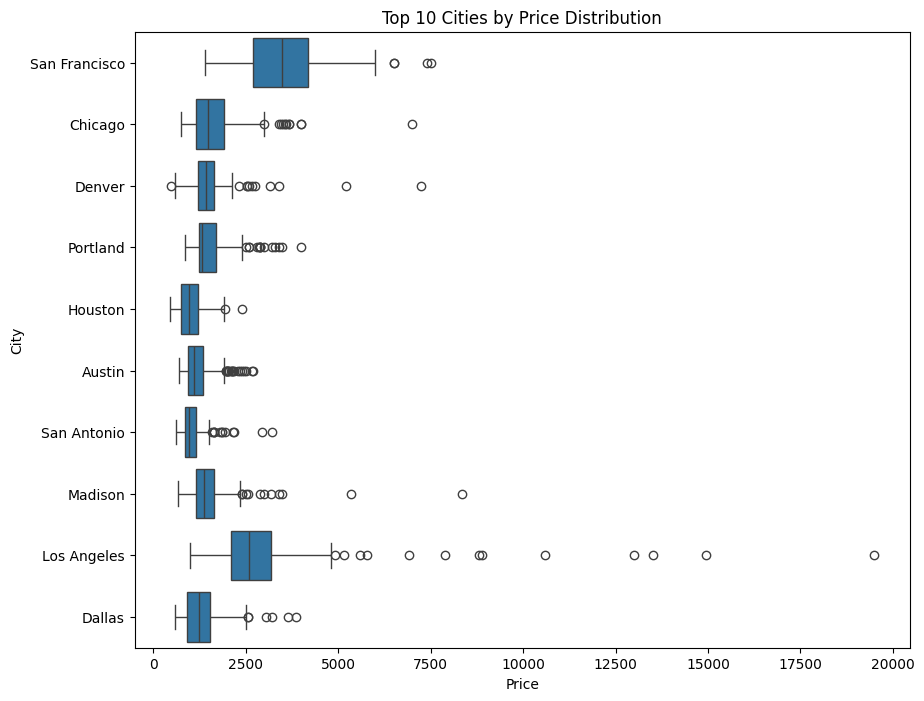

In [ ]:
# Data visualization
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='price', y='cityname', data=data[data['cityname'].isin(data['cityname'].value_counts().head(10).index)])
plt.title('Top 10 Cities by Price Distribution')
plt.xlabel('Price')
plt.ylabel('City')
plt.show()

In [ ]:
# Data preprocessing
data = data[['price', 'bathrooms', 'bedrooms', 'square_feet', 'category', 'price_type', 'cityname', 'state']]
data['price'] = data.groupby(['bedrooms', 'cityname'])['price'].transform(lambda x: x.fillna(x.mean()))
data['bathrooms'] = data.groupby('bedrooms')['bathrooms'].transform(lambda x: x.fillna(x.mean()))
data['bedrooms'] = data.groupby('bathrooms')['bedrooms'].transform(lambda x: x.fillna(x.mean()))
data['square_feet'] = data.groupby('bedrooms')['square_feet'].transform(lambda x: x.fillna(x.mean()))

data=data.dropna()

def remove_outliers_iqr(df, columns):
  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

data2 = remove_outliers_iqr(data.copy(), ['price', 'bathrooms', 'bedrooms', 'square_feet'])

# Encoding categorical variables
data_encoded = pd.get_dummies(data2, columns=['category', 'price_type', 'cityname', 'state'], drop_first=True)

# Prepare features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=31)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Training
y_pred = model.predict(X_test)  # Prediction
mse = mean_squared_error(y_test, y_pred)  # MSE
r2 = r2_score(y_test, y_pred)  # R2 score

# Output model performance
print(f"Linear Regression -> MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression -> MSE: 79809.27, R²: 0.66


## Conclusion

This report has analyzed 10,000 apartment listings across the United States to understand what influences rental prices. Through exploratory data analysis, we identified key trends:
- Rental prices predominantly increase with the number of bedrooms and bathrooms.
- Geographic location significantly affects pricing, with cities like San Francisco and New York showing the highest costs.

The linear regression model used for price prediction explained 66% of the variability in rental prices, demonstrating a good but improvable fit. While effective, the model suggests further refinement could better capture the complexities of the market.

For potential renters, these insights can guide better-informed decisions about where and what type of apartment to rent. Real estate investors can use this data to identify lucrative markets and investment opportunities.

Future efforts might include incorporating more detailed data and advanced modeling techniques to improve predictive accuracy and offer deeper insights into the dynamics of apartment rental prices.